This is being used to try out and visualize different methods of clustering.

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hcluster
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pkl_file = open('../data/df.pkl', 'rb')
df = pickle.load(pkl_file)
pkl_file.close() 

In [3]:
features = ['top_elev_(ft)', 
            'bottom_elev_(ft)', 
            'vert_rise_(ft)', 
            'slope_length_(ft)', 
            'avg_width_(ft)', 
            'slope_area_(acres)', 
            'avg_grade_(%)', 
            'max_grade_(%)', 
            'groomed']

X = df[features].values

In [4]:
X
ss = StandardScaler()
X = ss.fit_transform(X)

In [5]:
km4 = KMeans(n_clusters=4)

In [6]:
km_labels_4 = km4.fit_predict(X)

In [7]:
km6 = KMeans(n_clusters=6)

In [8]:
km_labels_6 = km6.fit_predict(X)

In [9]:
km48 = KMeans(n_clusters=48)

In [10]:
km_labels_48 = km48.fit_predict(X)

In [11]:
gm = GaussianMixture(n_components=4)

In [12]:
gmm = gm.fit(X)

In [13]:
gm_labels = gmm.predict(X)

In [14]:
pca = PCA(n_components=2)

In [15]:
pca_mod = pca.fit_transform(X)

In [16]:
pca_mod

array([[ 2.8521369 , -0.25040679],
       [ 1.84450237, -1.87684579],
       [ 2.02740853, -1.68720825],
       ..., 
       [-3.59626217,  0.22597847],
       [-3.39714525,  0.16942425],
       [-3.18796784,  0.24473116]])

In [48]:
km_labels, gm_labels

(array([1, 1, 1, ..., 0, 0, 0], dtype=int32), array([3, 3, 3, ..., 0, 0, 0]))

In [54]:
np.where(km_labels == 1)[0].shape

(399,)

In [53]:
np.where(gm_labels == 3)[0].shape

(625,)

In [25]:
color_num_array = df.color_nums.values

In [226]:
def plot_iterations(iterations, data, clusters, plotname = None):
    '''
    iterations is a list, data is a np array
    '''
    fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(12,8))
    ax = ax.flatten()

    init_points = data[:3]
    for j, it in enumerate(iterations):
        km = KMeans(n_clusters=clusters, n_init=1, max_iter=it, \
                    random_state=0, n_jobs=-1)
        km.fit(data)
        cents = km.cluster_centers_
        labels = km.labels_
        ax[j].scatter(data[:,0], data[:,1], s=10, c= labels, cmap = 'cool', alpha = 0.6)
        ax[j].scatter(cents[:,0], cents[:,1], s=50, c= 'k', label = 'centroids')
        ax[j].set_title('{} iterations, k={}'.format(it,clusters))

    plt.tight_layout()
    if plotname:
        plt.savefig(plotname)
    else:
        plt.show()

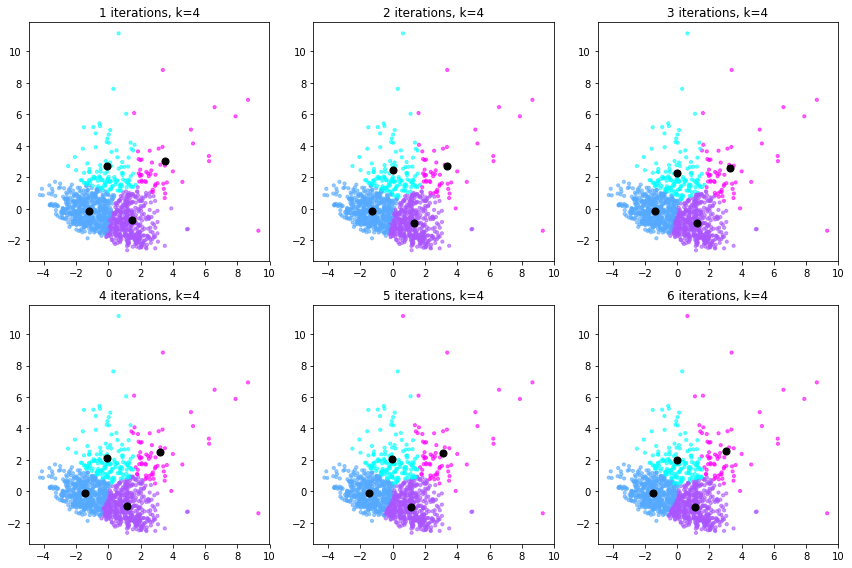

In [227]:
plot_iterations(range(1,7),pca_mod,4)

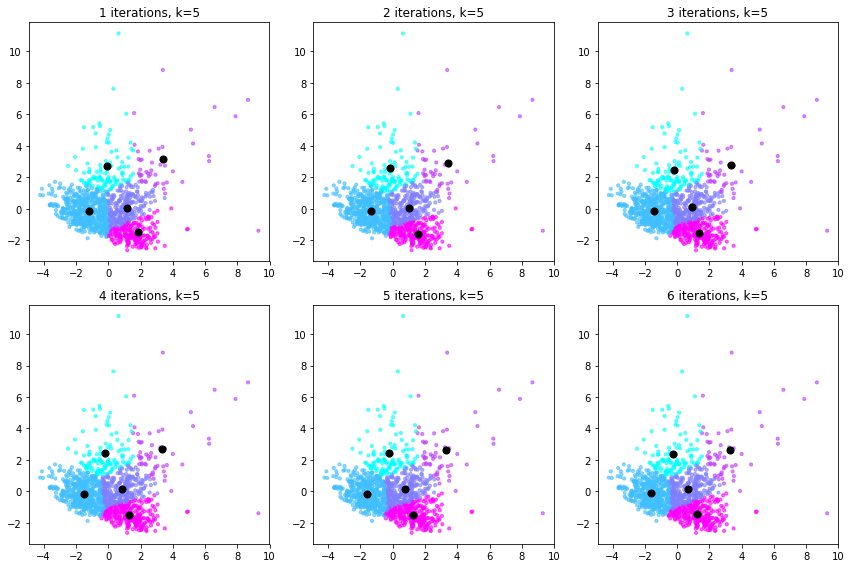

In [228]:
plot_iterations(range(1,7),pca_mod,5)

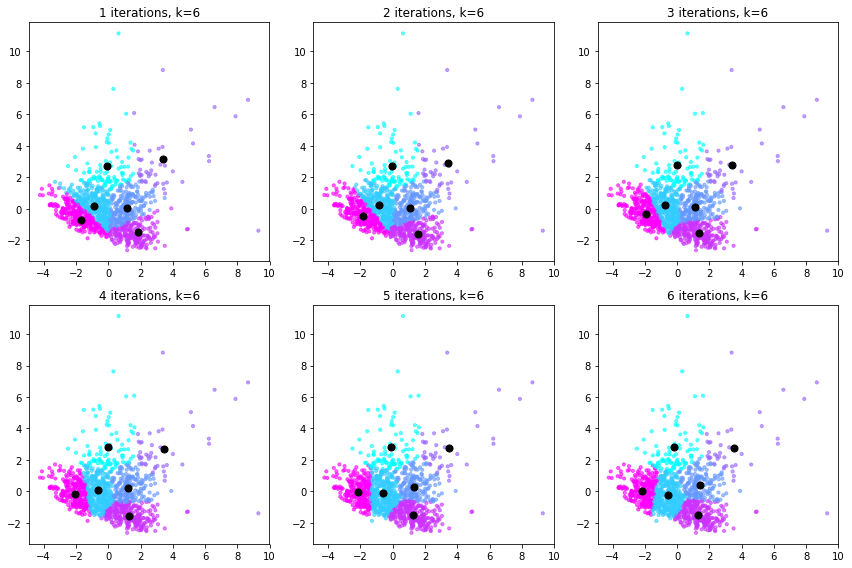

In [229]:
plot_iterations(range(1,7),pca_mod,6)

In [30]:
color_num_array

array([4, 4, 4, ..., 1, 1, 1])

In [22]:
df['km_labels_4'] = km_labels_4

In [23]:
df['km_labels_6'] = km_labels_6

In [24]:
df['km_labels_48'] = km_labels_48

In [169]:
df.head()

,trail_name,top_elev_(ft),bottom_elev_(ft),vert_rise_(ft),slope_length_(ft),avg_width_(ft),slope_area_(acres),avg_grade_(%),max_grade_(%),ability_level,resort,location,groomed,colors,ability_nums,color_nums,km_labels_4,km_labels_6,km_labels_48
0,Over the Rainbow,11924.0,10858.0,1066.0,2404.0,319.0,17.6,50.0,69.0,Expert,Loveland,CO,0,bb,6,4,3,4,0
1,Zoom,11405.0,11005.0,400.0,839.0,195.0,3.7,55.0,66.0,Expert,Loveland,CO,0,bb,6,4,3,4,35
2,Avalanche Bowl,11840.0,11405.0,435.0,1141.0,255.0,6.7,42.0,76.0,Expert,Loveland,CO,0,bb,6,4,3,4,0
3,Tiger's Tail,11856.0,11469.0,386.0,1183.0,136.0,3.7,35.0,61.0,Expert,Loveland,CO,0,black,6,3,3,4,36
4,Spillway,11849.0,11631.0,218.0,702.0,198.0,3.2,33.0,41.0,Intermediate,Loveland,CO,1,blue,4,2,2,1,25


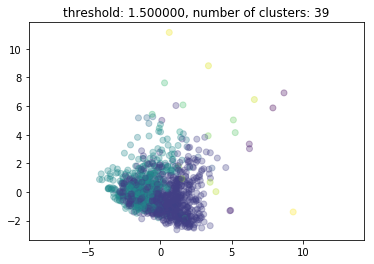

In [67]:
# clustering
thresh = 1.5
clusters = hcluster.fclusterdata(X, thresh, criterion="distance")

# plotting
plt.scatter(pca_mod[:,0],pca_mod[:,1], c=clusters,alpha = .3)
plt.axis("equal")
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.title(title)
plt.show()

In [135]:
def plot_one_cluster_by_color(col,cluster_num):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
    cluster_df = df[df[col] == cluster_num]
    data = []
    colors = ['green','blue','black','red']
    labels = ['green','blue','black','bb']
    for color in ['green','blue','black','bb']:
        mat = cluster_df[features][df['colors'] == color].values
        data.append(pca_matrix(mat))
    for data, color, label in zip(data,colors,labels):
        ax.scatter(data[:,0],data[:,1],c=color,label=label);

In [25]:
def pca_matrix(mat):
    cluster_X = ss.transform(mat)
    cluster_data = pca.transform(cluster_X)
    return cluster_data

[[  1.07920000e+04   9.85100000e+03   9.41000000e+02   4.89300000e+03
    1.85000000e+02   2.08000000e+01   2.00000000e+01   3.40000000e+01
    1.00000000e+00]
 [  1.14220000e+04   1.03340000e+04   1.08800000e+03   6.81900000e+03
    1.71000000e+02   2.68000000e+01   1.60000000e+01   2.50000000e+01
    1.00000000e+00]
 [  1.15860000e+04   1.06200000e+04   9.65000000e+02   5.73200000e+03
    1.79000000e+02   2.36000000e+01   1.70000000e+01   3.30000000e+01
    1.00000000e+00]
 [  1.11960000e+04   9.87400000e+03   1.32200000e+03   1.79890000e+04
    2.70000000e+01   1.12000000e+01   7.00000000e+00   2.50000000e+01
    1.00000000e+00]
 [  1.09900000e+04   1.03300000e+04   6.60000000e+02   6.61210000e+03
    2.09000000e+02   3.18000000e+01   1.00000000e+01   2.10000000e+01
    0.00000000e+00]
 [  1.09830000e+04   9.80300000e+03   1.18010000e+03   7.51470000e+03
    1.79000000e+02   3.09000000e+01   1.60000000e+01   3.40000000e+01
    1.00000000e+00]
 [  1.10220000e+04   9.72000000e+03   1.

[[  7.36900000e+03   6.93300000e+03   4.36000000e+02   1.77700000e+03
    4.35000000e+02   1.78000000e+01   2.50000000e+01   3.50000000e+01
    1.00000000e+00]
 [  8.47000000e+03   7.81400000e+03   6.56000000e+02   1.97000000e+03
    4.72000000e+02   2.14000000e+01   3.60000000e+01   6.90000000e+01
    1.00000000e+00]
 [  7.83700000e+03   7.57400000e+03   2.63000000e+02   7.68000000e+02
    1.73000000e+02   3.10000000e+00   3.80000000e+01   8.90000000e+01
    1.00000000e+00]
 [  7.86000000e+03   7.53600000e+03   3.24000000e+02   1.18700000e+03
    3.62000000e+02   9.90000000e+00   2.90000000e+01   4.30000000e+01
    1.00000000e+00]
 [  7.86700000e+03   7.58300000e+03   2.84000000e+02   7.68000000e+02
    2.76000000e+02   4.90000000e+00   4.00000000e+01   4.40000000e+01
    1.00000000e+00]
 [  7.58100000e+03   7.29400000e+03   2.87000000e+02   9.51000000e+02
    2.40000000e+02   5.20000000e+00   3.20000000e+01   4.50000000e+01
    0.00000000e+00]
 [  7.60400000e+03   7.06400000e+03   5.

[]


ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required by StandardScaler.

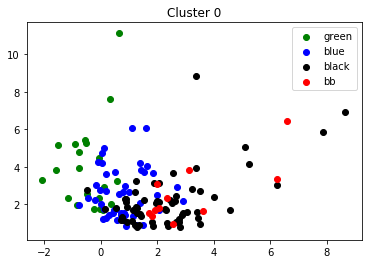

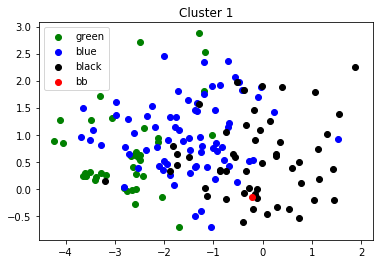

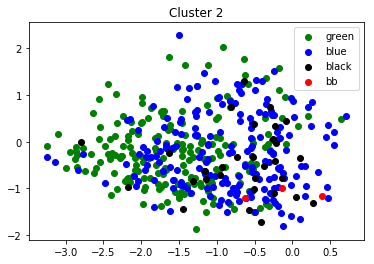

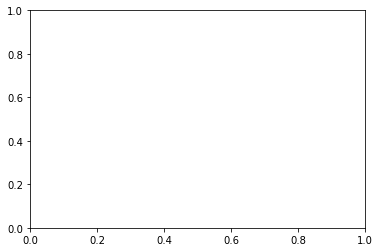

In [138]:
for num in range(0,4):
    plot_one_cluster_by_color('km_labels_4',num)
    plt.title('Cluster {}'.format(num))
    plt.legend()

# Checking the clusters to see what the makeup is in terms of colors and resorts

In [217]:
cluster_0of4_df = df[df['km_labels_4'] == 0]
cluster_1of4_df = df[df['km_labels_4'] == 1]
cluster_2of4_df = df[df['km_labels_4'] == 2]
cluster_3of4_df = df[df['km_labels_4'] == 3]
clusters4 = [cluster_0of4_df,cluster_1of4_df,cluster_2of4_df,cluster_3of4_df]
names4 = ['cluster 1','cluster 2', 'cluster 3', 'cluster 4']

In [212]:
for cluster,name in zip(clusters4,names4):
    print(name)
    for color in ['green','blue','black','bb']:
        print('{}: {}'.format(color,int(cluster[cluster['colors'] == color].size/19)))
    print('\n')

cluster 1
green: 21
blue: 46
black: 61
bb: 11


cluster 2
green: 39
blue: 73
black: 53
bb: 1


cluster 3
green: 198
blue: 190
black: 30
bb: 3


cluster 4
green: 0
blue: 75
black: 261
bb: 63




In [222]:
cluster_0of6_df = df[df['km_labels_6'] == 0]
cluster_1of6_df = df[df['km_labels_6'] == 1]
cluster_2of6_df = df[df['km_labels_6'] == 2]
cluster_3of6_df = df[df['km_labels_6'] == 3]
cluster_4of6_df = df[df['km_labels_6'] == 4]
cluster_5of6_df = df[df['km_labels_6'] == 5]
clusters6 = [cluster_0of6_df,cluster_1of6_df,cluster_2of6_df,cluster_3of6_df,cluster_4of6_df,cluster_5of6_df]
names6 = ['cluster 1','cluster 2', 'cluster 3', 'cluster 4','cluster 5', 'cluster 6']

In [224]:
for cluster,name in zip(clusters6,names6):
    print(name)
    for ability_level in df.ability_level.unique():
        print('{}: {}'.format(ability_level,int(cluster[cluster['ability_level'] == ability_level].size/19)))
    print('\n')

cluster 1
Expert: 34
Intermediate: 39
Advanced: 27
Low Intermediate: 19
Novice: 8
Beginner: 12
Glade: 1


cluster 2
Expert: 3
Intermediate: 93
Advanced: 20
Low Intermediate: 97
Novice: 75
Beginner: 21
Glade: 0


cluster 3
Expert: 12
Intermediate: 34
Advanced: 16
Low Intermediate: 47
Novice: 47
Beginner: 13
Glade: 2


cluster 4
Expert: 21
Intermediate: 3
Advanced: 9
Low Intermediate: 3
Novice: 0
Beginner: 0
Glade: 8


cluster 5
Expert: 207
Intermediate: 33
Advanced: 112
Low Intermediate: 1
Novice: 0
Beginner: 0
Glade: 5


cluster 6
Expert: 17
Intermediate: 31
Advanced: 25
Low Intermediate: 17
Novice: 13
Beginner: 0
Glade: 0




In [170]:
cluster_0of48_df = df[df['km_labels_48'] == 0]
cluster_1of48_df = df[df['km_labels_48'] == 1]
cluster_2of48_df = df[df['km_labels_48'] == 2]
cluster_3of48_df = df[df['km_labels_48'] == 3]

In [171]:
print(cluster_0of48_df[cluster_0of48_df['colors'] == 'green'].size)
print(cluster_0of48_df[cluster_0of48_df['colors'] == 'blue'].size)
print(cluster_0of48_df[cluster_0of48_df['colors'] == 'black'].size)
print(cluster_0of48_df[cluster_0of48_df['colors'] == 'bb'].size)

0
19
361
190


In [175]:
for resort in df.resort.unique():
    print(cluster_0of48_df[cluster_0of48_df['resort'] == resort].size)

114
152
114
0
0
38
57
0
38
0
57
0


In [176]:
def rss(data, labels):
    rss = []
    for label in np.unique(labels):
        filter_data = data[labels == label]
        rss.append(((filter_data - filter_data.mean(axis = 0))**2).sum())
    return sum(rss)


def make_elbow_plot(data, ks, plotname = None):
    rsss = []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=0, n_jobs=-1)
        km.fit(data)
        rsss.append(rss(data, km.labels_))
    fig, ax = plt.subplots()
    ax.plot(ks, rsss)
    ax.set_xlabel('k')
    ax.set_ylabel('RSS')
    ax.set_title('Elbow Plot')
    if plotname:
        plt.savefig(plotname)
    else:
        plt.show()

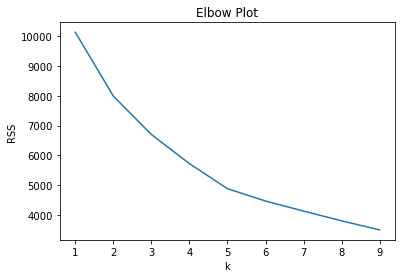

In [180]:
make_elbow_plot(X,range(1,10))

In [181]:
def make_silhouette_plot(data, ks, plotname = None):
    silhouette_scores = []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=0, n_jobs=-1)
        km.fit(data)
        silhouette_scores.append(silhouette_score(data, km.labels_))
    fig, ax = plt.subplots()
    ax.plot(ks, silhouette_scores)
    ax.set_xlabel('k')
    ax.set_ylabel('Silhouette Score')
    ax.set_title('Plot of Silhouette Scores')
    if plotname:
        plt.savefig(plotname)
    else:
        plt.show()

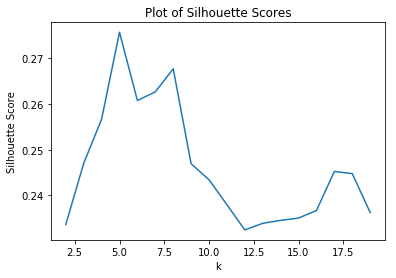

In [185]:
make_silhouette_plot(X,range(2,20))

# From the above two plots, 5 clusters seems to be the best...

In [67]:
clusters = 4
markers = ['o', 's', 'D', '*']
colors = ['green','blue','black','bb']
marker_dict = dict(zip(colors,markers))
labels = np.unique(km.labels_)
label_colors = ['seagreen','mediumvioletred','chartreuse','k']
label_dict = dict(zip(labels,label_colors))
color_array = df['colors'].values

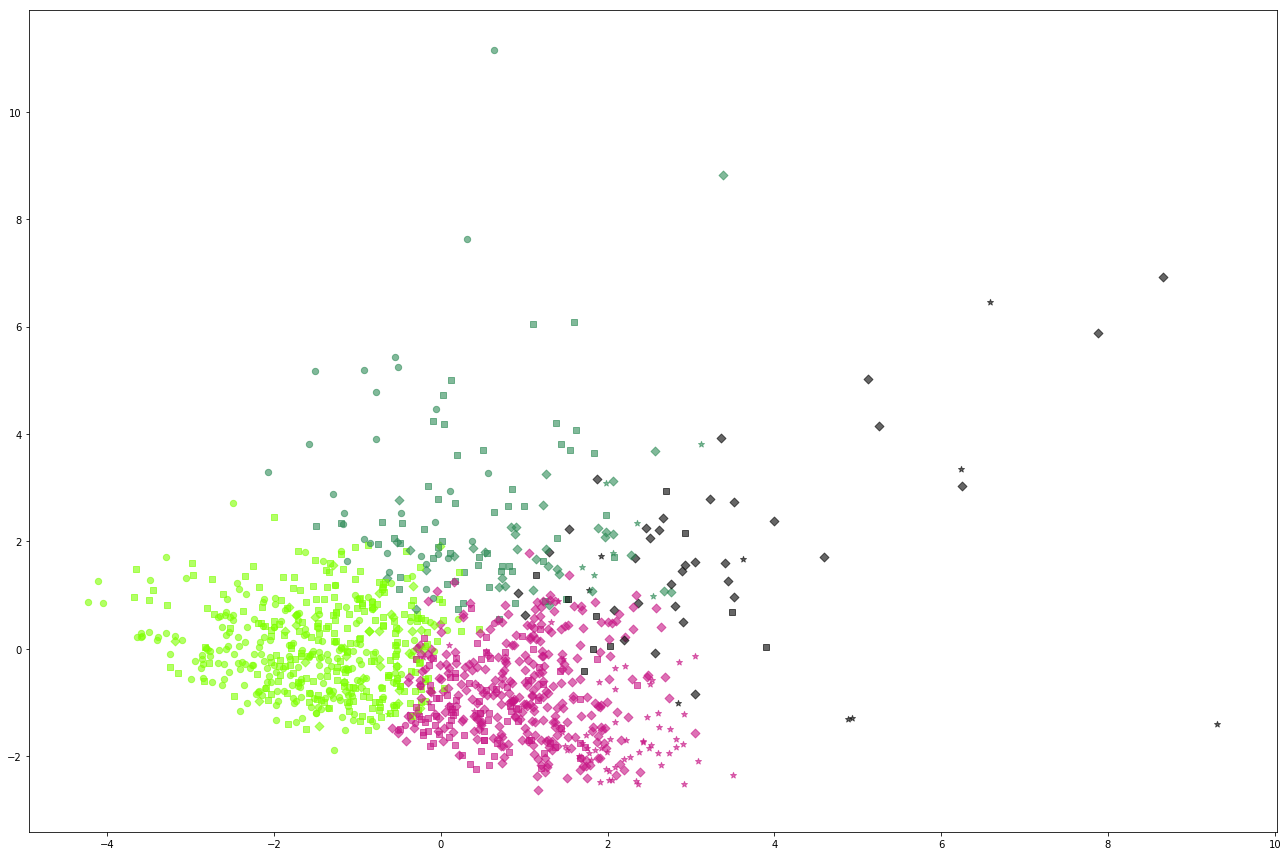

In [71]:
plt.figure(figsize=(18,12))
km = KMeans(n_clusters=clusters, n_init=1, random_state=0, n_jobs=-1)
km.fit(X)
labels = km.labels_
data = PCA(n_components=2).fit_transform(X)
for _x,_y,_c,_m in zip(data[:,0],data[:,1],[label_dict[x] for x in labels],[marker_dict[x] for x in color_array]):
    plt.scatter(_x, _y, s=40, c=_c, marker = _m, alpha=.6)
# plt.set_title('k={}'.format(clusters))

plt.tight_layout()

In [ ]:
def clusters_by_color(col):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
    cluster_df = df
    data = []
    markers = ['o', 's', 'D', '*']
    colors = ['green','blue','black','bb']
    marker_dict = dict(zip(colors,markers))
    for color in colors:
        mat = cluster_df[features][df['colors'] == color].values
        data.append(pca_matrix(mat))
    for data, color, label in zip(data,colors,markers):
        ax.scatter(data[:,0],data[:,1],c=color,label=label);